In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook',ticks=True, grid=False)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, plot_roc_curve, plot_precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv(r'dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC', missing_values='?')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

In [4]:
x = df.drop(columns = ['fnlwgt','income','education'])
y = np.where(df['income']=='>50K',1,0)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 10)

In [6]:
tree = DecisionTreeClassifier(max_depth = 3)
pipe_tree = Pipeline([
    ('transformer', transformer), ('model', tree)
])

In [7]:
pipe_tree.fit(x_train, y_train)

C:\Users\Shinjiriki\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 missing_values='?',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                     

In [8]:
y_pred = pipe_tree.predict(x_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6181
           1       0.68      0.53      0.59      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



In [10]:
pipe_tree[0].transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [11]:
features = list(pipe_tree[0].transformers_[0][1].get_feature_names()) + pipe_tree[0].transformers_[1][1][1].get_feature_names() + ['age', 'education.num','capital.gain','capital.loss','hours.per.week']
features

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [12]:
importance_table = pd.DataFrame(pipe_tree[1].feature_importances_, columns = ['imp'], index = features)
importance_table

,imp
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000000
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


<AxesSubplot:>

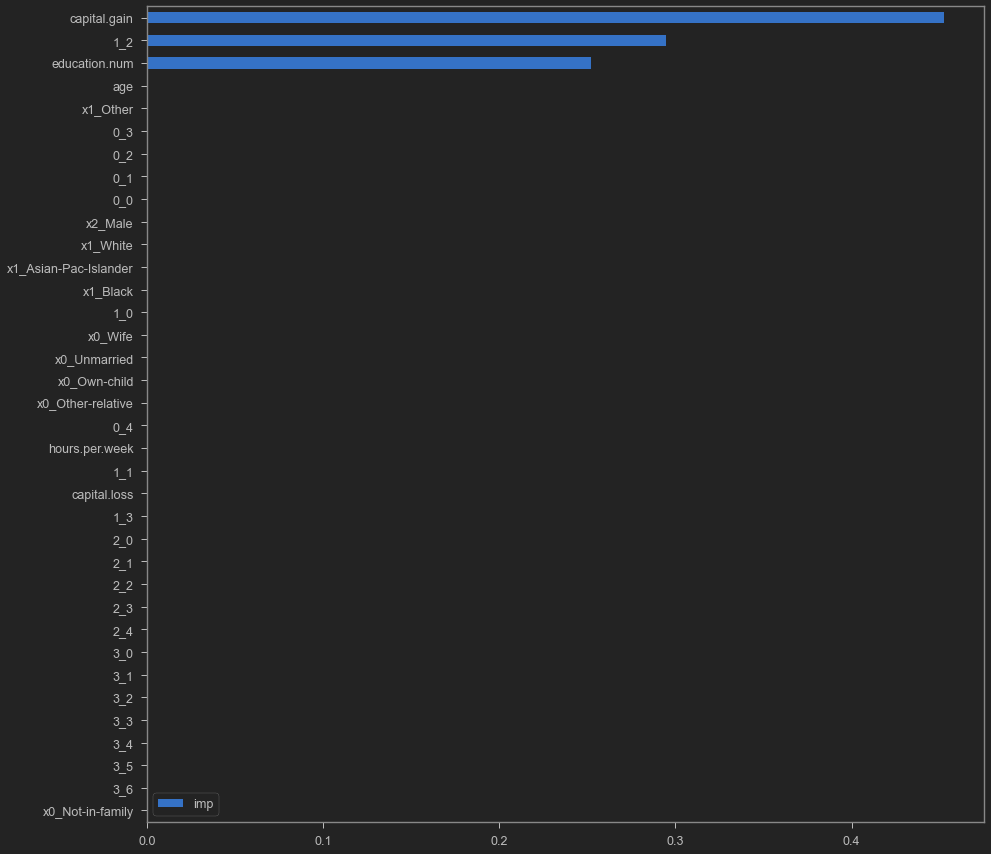

In [13]:
importance_table.sort_values('imp').plot(kind = 'barh', figsize = (15, 15))

[Text(558.0, 665.91, 'capital.gain <= 5119.0\ngini = 0.366\nsamples = 24420\nvalue = [18539, 5881]\nclass = <=50K'),
 Text(279.0, 475.65, '1_2 <= 0.5\ngini = 0.325\nsamples = 23225\nvalue = [18479, 4746]\nclass = <=50K'),
 Text(139.5, 285.39, 'education.num <= 12.5\ngini = 0.433\nsamples = 13867\nvalue = [9481, 4386]\nclass = <=50K'),
 Text(69.75, 95.13, 'gini = 0.348\nsamples = 10368\nvalue = [8040, 2328]\nclass = <=50K'),
 Text(209.25, 95.13, 'gini = 0.484\nsamples = 3499\nvalue = [1441, 2058]\nclass = >50K'),
 Text(418.5, 285.39, 'education.num <= 13.5\ngini = 0.074\nsamples = 9358\nvalue = [8998, 360]\nclass = <=50K'),
 Text(348.75, 95.13, 'gini = 0.053\nsamples = 8904\nvalue = [8661, 243]\nclass = <=50K'),
 Text(488.25, 95.13, 'gini = 0.383\nsamples = 454\nvalue = [337, 117]\nclass = <=50K'),
 Text(837.0, 475.65, 'capital.gain <= 7073.5\ngini = 0.095\nsamples = 1195\nvalue = [60, 1135]\nclass = >50K'),
 Text(697.5, 285.39, 'capital.gain <= 5316.5\ngini = 0.454\nsamples = 132\nvalu

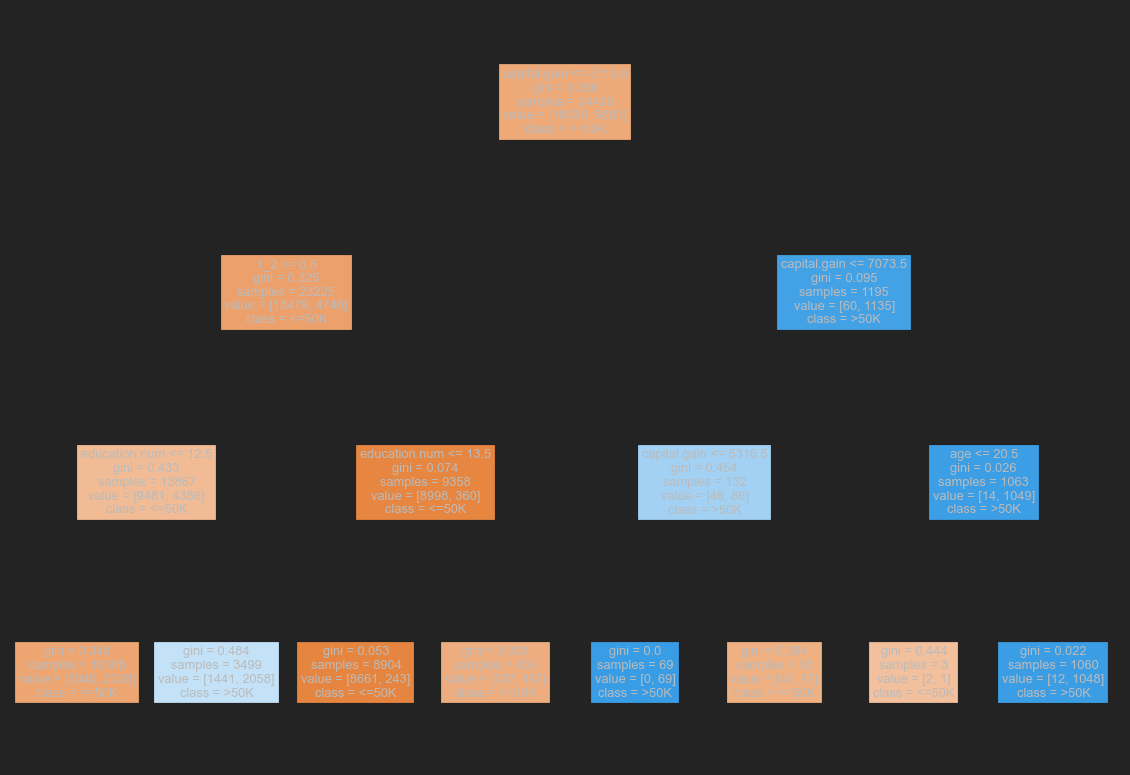

In [14]:
plt.figure(figsize = (20, 14))
plot_tree(pipe_tree[1], feature_names = features, filled = True, class_names=['<=50K','>50K'])

# Ada Boosting

In [15]:
tree = DecisionTreeClassifier(max_depth = 3)
model_ada = AdaBoostClassifier(tree, n_estimators = 200, learning_rate = 0.1, random_state = 10)
pipe_ada = Pipeline([
    ('transformer', transformer), ('model', model_ada)
])

In [16]:
pipe_ada.fit(x_train, y_train)
y_pred = pipe_ada.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Shinjiriki\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6181
           1       0.78      0.63      0.70      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



In [17]:
importance_table = pd.DataFrame(pipe_ada[1].feature_importances_, columns = ['imp'], index = features)
importance_table

,imp
x0_Not-in-family,0.009602
x0_Other-relative,0.009289
x0_Own-child,0.014575
x0_Unmarried,0.010174
x0_Wife,0.030319
x1_Asian-Pac-Islander,0.009420
x1_Black,0.011038
x1_Other,0.004983
x1_White,0.006060
x2_Male,0.025846


<AxesSubplot:>

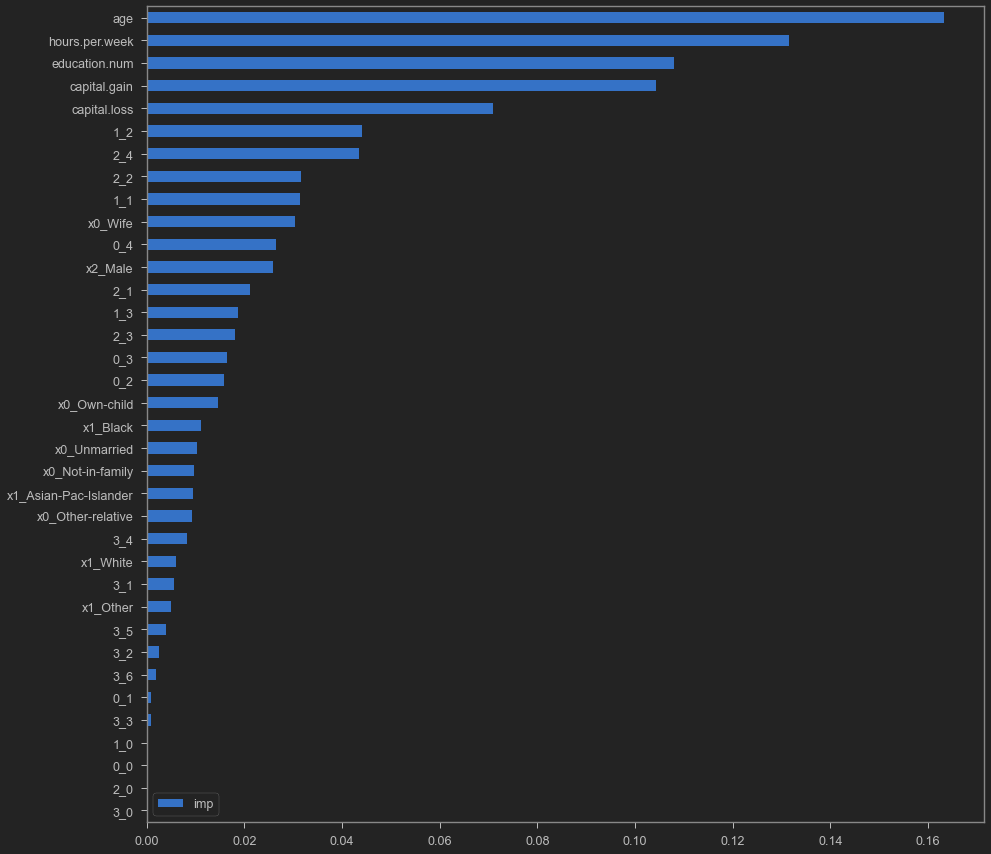

In [18]:
importance_table.sort_values('imp').plot(kind = 'barh', figsize = (15, 15))

# Gradient Boosting

In [19]:
model_grad = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 10)
pipe_grad = Pipeline([
    ('transformer', transformer),
    ('model', model_grad)
])

In [20]:
pipe_grad.fit(x_train, y_train)
y_pred = pipe_grad.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Shinjiriki\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



In [21]:
importance_table = pd.DataFrame(pipe_grad[1].feature_importances_, columns = ['imp'], index = features)
importance_table

,imp
x0_Not-in-family,0.004850
x0_Other-relative,0.000241
x0_Own-child,0.001212
x0_Unmarried,0.001823
x0_Wife,0.008601
x1_Asian-Pac-Islander,0.000321
x1_Black,0.000388
x1_Other,0.000033
x1_White,0.000492
x2_Male,0.009060


<AxesSubplot:>

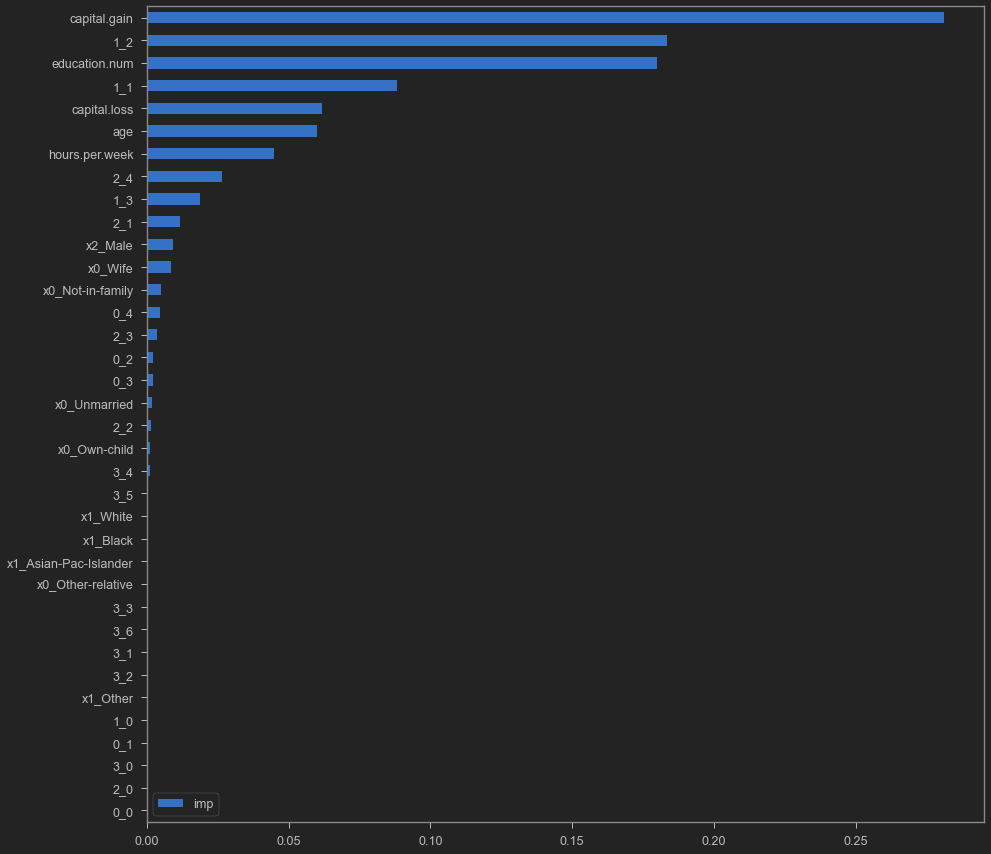

In [22]:
importance_table.sort_values('imp').plot(kind = 'barh', figsize = (15, 15))

# XGB (Extreme Gradient Boosting) Boosting

In [23]:
model_xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 10, 
                          disable_default_eval_metric = True)
pipe_xgb = Pipeline([
    ('transformer', transformer),
    ('model', model_xgb)
])

In [24]:
pipe_xgb.fit(x_train, y_train)
y_pred = pipe_xgb.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Shinjiriki\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Shinjiriki\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



In [25]:
importance_table = pd.DataFrame(pipe_xgb[1].feature_importances_, columns = ['imp'], index = features)
importance_table

,imp
x0_Not-in-family,0.019065
x0_Other-relative,0.005950
x0_Own-child,0.032394
x0_Unmarried,0.007194
x0_Wife,0.013635
x1_Asian-Pac-Islander,0.003121
x1_Black,0.003516
x1_Other,0.002723
x1_White,0.004893
x2_Male,0.023829


<AxesSubplot:>

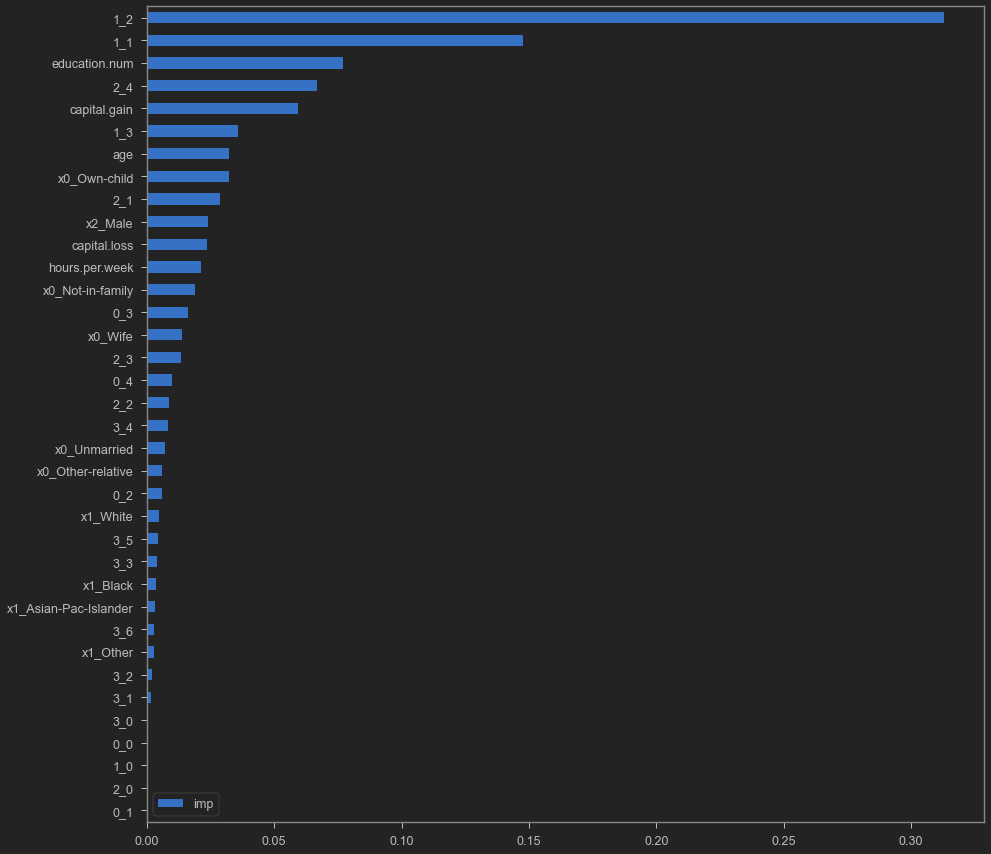

In [26]:
importance_table.sort_values('imp').plot(kind = 'barh', figsize = (15, 15))

# Tugas
Tugas: 

Pilihlah model terbaik dari 4 model di berikut sebagai benchmark model:

    * Decision Tree
    * Adaboost
    * gradient boost
    * XGboost  

Lakukan hyperparameter tunning dengan hyperparameter berikut:

    hyperparam_space = [  
                    {'clf__learning_rate':[0.1],'clf__n_estimators':[200],'clf__base_estimator__max_depth':[3,4,5]},  
                    {'clf__learning_rate':[0.05],'clf__n_estimators':[400],'clf__base_estimator__max_depth':[3,4,5]},  
                    {'clf__learning_rate':[0.01],'clf__n_estimators':[2000],'clf__base_estimator__max_depth':[3,4,5]},  
                    {'clf__learning_rate':[0.005],'clf__n_estimators':[4000],'clf__base_estimator__max_depth':[3,4,5]}]  

Gunakan f1 score sebagai metric evaluasi

Kalian bisa upload tugas yg sudak kalian buat ke github kalian dan email link github kalian ke: Brigita.gems@gmail.com untuk feedback.


In [27]:
def model_evaluation_cv(model):
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])
    model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'f1', cv = skfold)
    return model_cv

In [28]:
def print_result(model_cv):
    print('score : ', model_cv)
    print('mean score : ', model_cv.mean())
    print('std score : ', model_cv.std())

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
model = [tree, model_ada, model_grad, model_xgb]
model_name = ['tree', 'model_ada', 'model_grad', 'model_xgb']
model_std = []
model_mean = []
for i in model:
    model_cv = model_evaluation_cv(i)
    model_std.append(model_cv.std())
    model_mean.append(model_cv.mean())

overview = pd.DataFrame({'Name' : model_name, 'STD' : model_std, 'Mean' : model_mean})
overview

,Name,STD,Mean
0,tree,0.007411,0.605702
1,model_ada,0.013265,0.705721
2,model_grad,0.013179,0.698576
3,model_xgb,0.013476,0.698875


# Information :
    
    Dari model, yang terbaik adalah model yang diboosting dengan Ada tetapi stdnya cukup tinggi, 
    dan model yang paling balance(std) adalah Decision Tree sendiri tapi mean yang bisa dikatakan 
    paling rendah. 
    Sehingga yang menurut saya yang paling balance untuk mean dan std adalah boosting yang 
    dilakukan oleh gradient

# Hyperparameter Tuning

    akan diapply kesemuanya

In [46]:
hyperparam_space ={
    'model__learning_rate':[0.1, 0.05, 0.01, 0.005],
    'model__n_estimators':[50, 100, 150, 200],
    'model__base_estimator__max_depth':[3,4,5]
}

# ADA

In [32]:
model = AdaBoostClassifier(tree, n_estimators = 200, learning_rate = 0.1, random_state = 10)
estimator = Pipeline([
    ('transformer', transformer), ('model', model)
])

In [33]:
skfold = StratifiedKFold(n_splits = 5)
grid_search = GridSearchCV(estimator, param_grid = hyperparam_space, cv = skfold, scoring = 'f1', n_jobs = -1)

In [34]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
               

In [35]:
print('best score ', grid_search.best_score_)
print('best score ', grid_search.best_params_)

best score  0.7073055622952331
best score  {'model__base_estimator__max_depth': 4, 'model__learning_rate': 0.1, 'model__n_estimators': 200}


# Gradient

In [ ]:
hyperparam_space ={
    'model__learning_rate':[0.1, 0.05, 0.01, 0.005],
    'model__n_estimators':[50, 100, 150, 200],
    'model__max_depth':[3,4,5]
}

In [47]:
model = GradientBoostingClassifier(random_state = 10)
estimator = Pipeline([
    ('transformer', transformer), ('model', model)
])

In [48]:
skfold = StratifiedKFold(n_splits = 5)
grid_search = GridSearchCV(estimator, param_grid = hyperparam_space, cv = skfold, scoring = 'f1', n_jobs = -1)

In [49]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
               

In [50]:
print('best score ', grid_search.best_score_)
print('best score ', grid_search.best_params_)

best score  0.7136044802970757
best score  {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}


# XGB

In [51]:
model = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 10, 
                      disable_default_eval_metric = True)
estimator = Pipeline([
    ('transformer', transformer), ('model', model)
])

In [52]:
skfold = StratifiedKFold(n_splits = 5)
grid_search = GridSearchCV(estimator, param_grid = hyperparam_space, cv = skfold, scoring = 'f1')

In [53]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
               

In [54]:
print('best score ', grid_search.best_score_)
print('best score ', grid_search.best_params_)

best score  0.7085725465302429
best score  {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}


# Short Conclusion, each boosting increased in performance after hypertuning